<a href="https://colab.research.google.com/github/Htetkkhine/MMDT_2025_MLAI101/blob/htet_kay_khine/htet_kay_khine/mid-term_project/mid_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importing the pandas package
import pandas as pd

df = pd.read_csv('/content/laptop_price.csv')
# print(df.shape)
print(df.columns)

# df.columns = [name.strip() for name in list(df.columns)]
# print(df.columns)
# df.head()
print(df.isnull().sum())

df.info()
#df

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')
Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inc

In [ ]:
# select feature and target
sel_feature = ['Company','Inches','CPU_Company','CPU_Type','RAM (GB)','GPU_Company','OpSys','Weight (kg)']
X=df[sel_feature]
y=df['Price (Euro)']

# Import the library to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state=42)

# print the size of the training and testing data
print(X_train.shape, X_test.shape)

(892, 8) (383, 8)


In [ ]:
# using sklearn pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define columns
numerical = ['Inches', 'RAM (GB)', 'Weight (kg)']
categorical = ['Company', 'CPU_Company', 'CPU_Type', 'GPU_Company', 'OpSys']

# ColumnTransformer: apply PolynomialFeatures ONLY to numerical
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(include_bias=False))
    ]), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# GridSearchCV parameter: match the full nested path
param_grid = {
    'preprocessor__num__poly__degree': [2, 3, 4, 5]
}

# GridSearchCV
poly_grid = GridSearchCV(pipeline,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           error_score='raise')

poly_grid.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['Inches',
                                                                          'RAM '
                                                                          '(GB)',
                                                                          'Weight '
                                                                          '(kg)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Company',
                                                                          'CPU_Company',
                                                                          'CPU_Type',
                                                                          'GPU_Company',
                                                                          'OpSys'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'preprocessor__num__poly__degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_parameters = poly_grid.best_params_
# print the best value of parameters
print('best order is:',best_parameters)


best order is: {'preprocessor__num__poly__degree': 2}


In [ ]:
import numpy as np
# predict the sales for the testing data
ytest_pred = poly_grid.predict(X_test)

#predict the sales for the training data
ytrain_pred = poly_grid.predict(X_train)
df_train_result = pd.DataFrame({'Actual': y_train,'Predicted_value': np.round(ytrain_pred)})
df_train_result.reset_index(drop=True, inplace=True) # Reset the index

df_test_result = pd.DataFrame({'Actual': y_test,'Predicted_value': np.round(ytest_pred)})
df_test_result.reset_index(drop=True, inplace=True)
df_test_result

,Actual,Predicted_value
0,650.0,603.0
1,716.0,731.0
2,1584.0,1388.0
3,1020.0,758.0
4,1749.0,1251.0
...,...,...
378,1825.0,1268.0
379,2419.0,1714.0
380,553.0,376.0
381,798.0,903.0


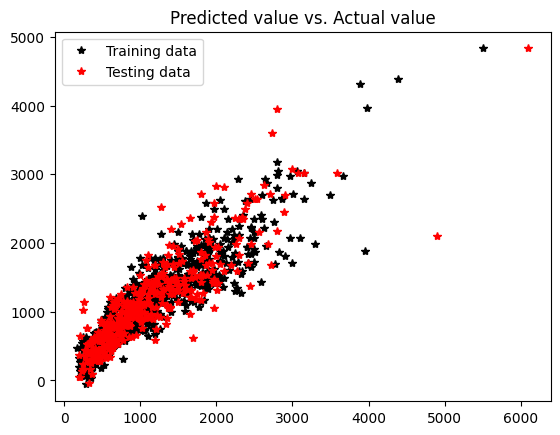

In [18]:
# import matplotlib for visualization

import matplotlib.pyplot as plt
plt.plot(y_train, ytrain_pred, 'k*')
plt.plot(y_test, ytest_pred, 'r*')

plt.title("Predicted value vs. Actual value")
plt.legend(["Training data", "Testing data"])
plt.show()


In [ ]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evaluate on the training set
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error:', np.round(mae))
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error:', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is:', r2)

# evaluate on the training set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error:', np.round(mae))
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error:', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is:', r2)




Mean absolute error: 204.0
Mean squared error: 84864.44844154973
R2 score is: 0.8232048453267953
Mean absolute error: 245.0
Mean squared error: 125208.69474197677
R2 score is: 0.7569716773641164
